Eigenvalue for mode 1: 0.9999990463256836
Eigenvalue for mode 2: 2.9999990463256836
Eigenvalue for mode 3: 4.999999046325684
Eigenvalue for mode 4: 6.999999046325684
Eigenvalue for mode 5: 8.999999046325684


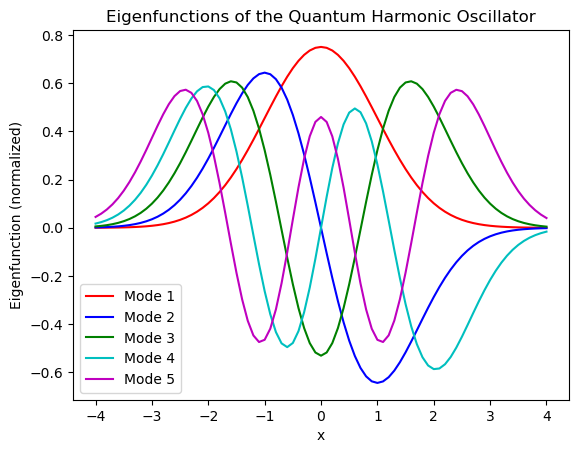

In [65]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants
L = 4  # The boundary for x, as specified in the problem
K = 1  # Given in the problem, K=1
tol = 1e-4  # Convergence tolerance
col = ['r', 'b', 'g', 'c', 'm']  # Colors for different modes
A1 = []  # To store absolute values of eigenfunctions
A2 = []  # To store eigenvalues

# Define the shooting equation system
def shoot2(y, x, beta):
    return [y[1], (K * x**2 - beta) * y[0]]

# Range of x
xshoot = np.arange(-L, L + 0.1, 0.1)

# Initial guess for beta (eigenvalue)
beta_start = -1

# Begin loop over the first five modes
for modes in range(1, 6):
    beta = beta_start
    dbeta = -1  # Step size for adjusting beta
    
    # Iterate to find the correct eigenvalue (beta)
    for _ in range(1000):
        # Initial conditions for y at x = -L 
        y0 = [1e-5, np.sqrt(K*L**2 - beta)*1e-5]  
        
        # Solve the differential equation using odeint
        y = odeint(shoot2, y0, xshoot, args=(beta,))
        
        # Check if the solution meets the boundary condition at x = L
        if abs(y[-1, 1] + y[-1, 0] * np.sqrt(K*L**2 - beta)) < tol:  # y at x = L
            print(f"Eigenvalue for mode {modes}: {beta}")
            A2.append(beta)
            break
        
        # Adjust beta (the eigenvalue)
        if (-1)**(modes + 1) * y[-1, 0] > 0:
            beta -= dbeta
        else:
            beta += dbeta
        dbeta /= 2  # Reduce step size for finer adjustment
    
    # Save the found eigenvalue and use it as the start for the next mode
    beta_start = beta + 0.5
    
    # Normalize the eigenfunction
    norm = np.trapz(y[:, 0]**2, xshoot)
    normalized_eigenfunction = y[:, 0] / np.sqrt(norm)
    
    # Append the absolute value of the eigenfunction to matrix A1
    A1.append(np.abs(normalized_eigenfunction))
    
    # Plot the normalized eigenfunction
    plt.plot(xshoot, normalized_eigenfunction, col[modes - 1], label=f'Mode {modes}')

# Convert A1 to a numpy array for easier manipulation
A1 = np.array(A1).T  # Transpose to have eigenfunctions as columns

# Show plot
plt.legend()
plt.title('Eigenfunctions of the Quantum Harmonic Oscillator')
plt.xlabel('x')
plt.ylabel('Eigenfunction (normalized)')
plt.show()


In [67]:
print(A1.shape)

(81, 5)
